# Image Classification Using CNN

*CNN stands for **Convolutional Neural Network**. It's a type of deep learning algorithm that uses mathematical operations to analyze and process images. CNNs are often used for image classification and recognition because of their high accuracy.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import sklearn

<span style='color:Blue'>*Load the dataset*
</span>

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)


In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

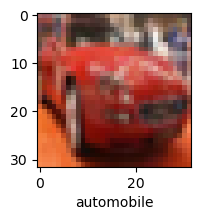

In [11]:
plot_sample(X_train, y_train, 5)

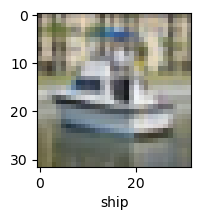

In [12]:
plot_sample(X_train, y_train, 501)

<span style='color:Blue'> *Normalizing the training data*
</span>


In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<span style='color:Blue'> *Build simple artificial neural network for image classification*
</span>

*The code you have provided creates a sequential model with three dense layers. The first layer has 3000 neurons and uses the relu activation function. The second layer also has 3000 neurons and uses the relu activation function. The third layer has 10 neurons and uses the softmax activation function. The model is compiled using the SGD optimizer, the sparse_categorical_crossentropy loss function, and the accuracy metric. The model is then fit on the X_train and y_train data for 5 epochs.*

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.8061 - accuracy: 0.3582
Epoch 2/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6218 - accuracy: 0.4315
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5397 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4762 - accuracy: 0.4793
Epoch 5/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4301 - accuracy: 0.4969


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.66      0.54      1000
           1       0.61      0.52      0.56      1000
           2       0.36      0.42      0.39      1000
           3       0.41      0.27      0.32      1000
           4       0.41      0.45      0.43      1000
           5       0.51      0.27      0.36      1000
           6       0.59      0.44      0.51      1000
           7       0.63      0.45      0.52      1000
           8       0.64      0.59      0.62      1000
           9       0.39      0.74      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [16]:
import seaborn as sns

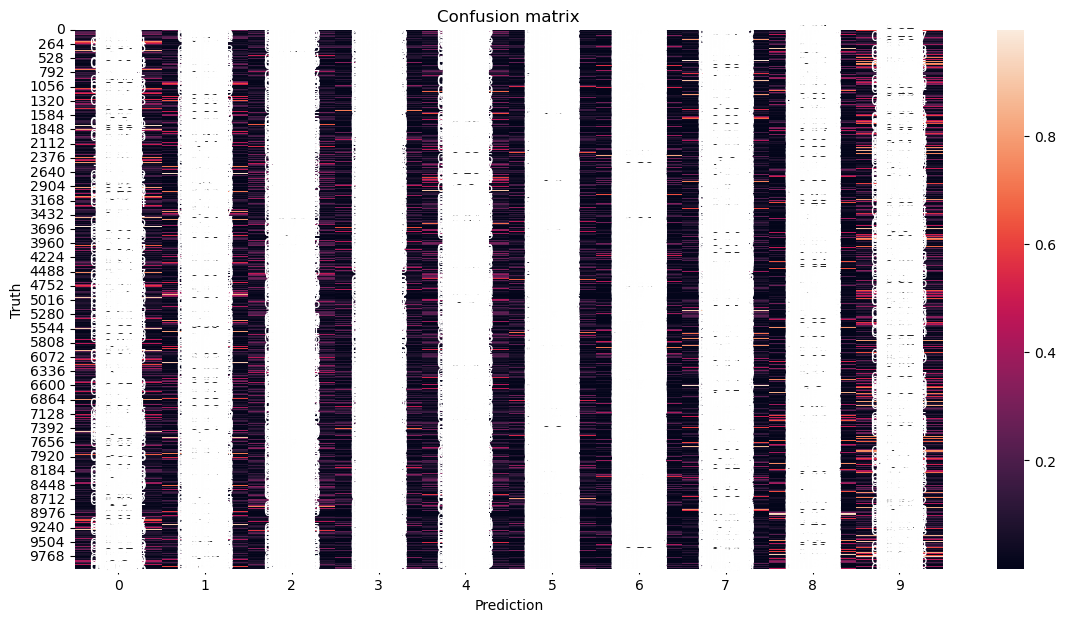

In [17]:
plt.figure(figsize = (14, 7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show()

<span style='color:Blue'> *Now let us build a convolutional neural network to train our images*
</span>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5002 - accuracy: 0.4643
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1387 - accuracy: 0.6033
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0092 - accuracy: 0.6525
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9274 - accuracy: 0.6802
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8666 - accuracy: 0.7004
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8097 - accuracy: 0.7208
Epoch 7/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7605 - accuracy: 0.7371
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7217 - accuracy: 0.7499
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6794 - accuracy: 0.7640
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [21]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9217 - accuracy: 0.6950


[0.9217047691345215, 0.6949999928474426]

In [22]:
y_prediction = cnn.predict(X_test)
y_prediction[:5]

313/313 [==============================] - 2s 5ms/step


array([[7.09173182e-05, 1.92605003e-05, 1.91671611e-03, 8.81087601e-01,
        2.95505452e-04, 5.83866164e-02, 1.15141622e-03, 4.79985574e-05,
        5.58303967e-02, 1.19349174e-03],
       [4.62847240e-02, 2.35456035e-01, 1.14868759e-04, 3.52707757e-05,
        3.42747569e-07, 1.51109887e-07, 3.80155882e-07, 1.89427467e-07,
        7.10646212e-01, 7.46181235e-03],
       [4.89138328e-02, 3.76797795e-01, 1.98303186e-03, 1.46966986e-03,
        3.85095918e-04, 7.29346866e-05, 2.66416115e-04, 1.08388667e-04,
        5.53519726e-01, 1.64830927e-02],
       [7.45548368e-01, 1.39407367e-01, 1.09768305e-02, 4.44466062e-03,
        2.98584579e-04, 5.48062453e-05, 3.26690824e-05, 1.17654636e-04,
        9.08390060e-02, 8.28008633e-03],
       [1.25623046e-06, 1.04770163e-06, 3.03753056e-02, 1.26186246e-02,
        7.71092296e-01, 1.49639091e-03, 1.84395775e-01, 9.31142040e-06,
        8.88157138e-06, 1.17540640e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 9, 0, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

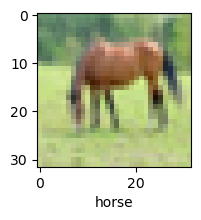

In [25]:
plot_sample(X_test, y_test, 60)

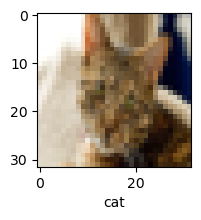

In [26]:
plot_sample(X_test, y_test, 103)


In [27]:
classes[y_classes[103]] 

'cat'